In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
import pandas as pd
from nltk.util import ngrams

In [9]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Narges\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Narges\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [115]:
with open('David_Copperfield.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [116]:
text = text.lower()

sentenced_text = text.replace("\n", " ")
sentenced_text = re.sub(r'\s+', ' ', text).strip()
text = re.sub(r'\d+', '', text)  
text = re.sub(r'[^\w\s]', '', text) 

tokens = nltk.word_tokenize(text)
tagged_words = nltk.pos_tag(tokens)
sentences = nltk.sent_tokenize(sentenced_text)

words = text.split()

### WordCloud in python

In [38]:
joined_text = ' '.join(words)

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joined_text)

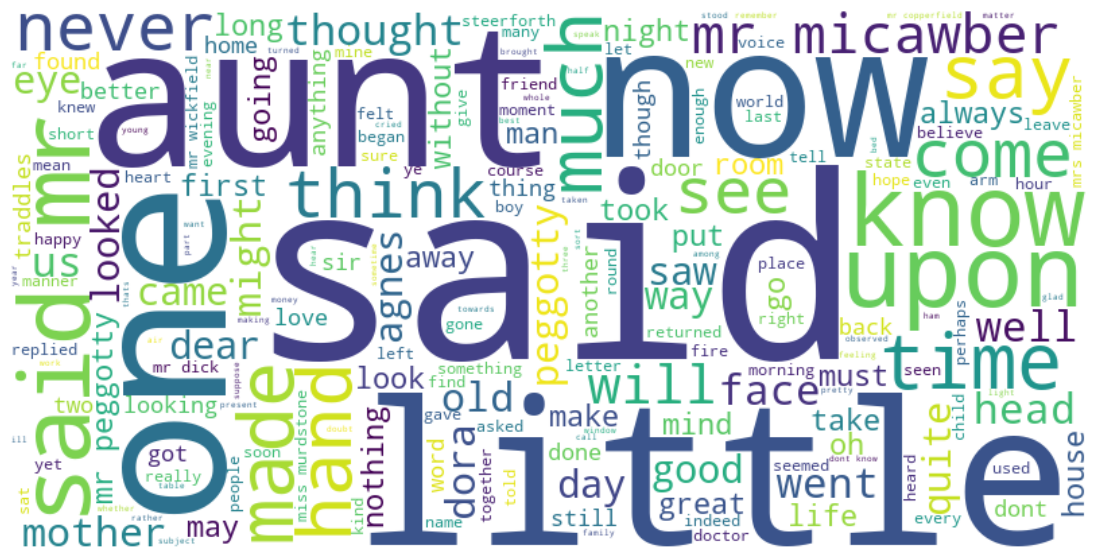

In [40]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Wordcloud

In [41]:
word_counts = Counter(words)
df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
df.to_csv('wordcloud_powerbi.csv', index=False)

### Word Frequency

In [42]:
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
word_freq_df.to_csv('word_frequency.csv', index=False)


### POS Frequency

In [43]:
def simplify_pos(tag):
    if tag.startswith('NN'):
        return 'Noun'
    elif tag.startswith('VB'):
        return 'Verb'
    elif tag.startswith('JJ'):
        return 'Adjective'
    elif tag.startswith('RB'):
        return 'Adverb'
    else:
        return 'Other'

In [44]:
pos_categories = [simplify_pos(tag) for _, tag in tagged_words]
pos_counts = Counter(pos_categories)

In [45]:
df_pos = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count'])
df_pos.to_csv('pos_counts_powerbi.csv', index=False)

### POS Transfer

In [46]:
transition_counts = Counter()
for i in range(len(pos_categories) - 1):
    from_pos = pos_categories[i]
    to_pos = pos_categories[i + 1]
    transition_counts[(from_pos, to_pos)] += 1


In [47]:
df_transitions = pd.DataFrame(
    [(from_pos, to_pos, count) for (from_pos, to_pos), count in transition_counts.items()],
    columns=['From_POS', 'To_POS', 'Count']
)
df_transitions.to_csv('pos_transitions_powerbi.csv', index=False)

### Bigrams

In [48]:
bigrams = list(ngrams(tokens, 2))
bigrams_freq = Counter(bigrams)

In [49]:
bigram_freq_df = pd.DataFrame(bigrams_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False)
bigram_freq_df.to_csv('bigram_frequency.csv', index=False)

### Trigrams

In [50]:
trigrams = list(ngrams(tokens, 3))
trigram_freq = Counter(trigrams)

In [51]:
trigram_freq_df = pd.DataFrame(trigram_freq.items(), columns=['Trigram', 'Frequency']).sort_values(by='Frequency', ascending=False)
trigram_freq_df.to_csv('trigram_frequency.csv', index=False)

### Depth

In [52]:
distances = []
last_seen = {'Noun': -1, 'Verb': -1, 'Adjective': -1}

In [53]:
for i, (word, tag) in enumerate(tagged_words):
    simple = simplify_pos(tag)
    
    distance_info = {
        'Word': word,
        'POS': simple,
        'Distance_from_last_Noun': i - last_seen['Noun'] if last_seen['Noun'] != -1 else None,
        'Distance_from_last_Verb': i - last_seen['Verb'] if last_seen['Verb'] != -1 else None,
        'Distance_from_last_Adjective': i - last_seen['Adjective'] if last_seen['Adjective'] != -1 else None
    }
    
    if simple in last_seen:
        last_seen[simple] = i

    distances.append(distance_info)

In [54]:
df = pd.DataFrame(distances)
df.to_csv('distance_from_last_pos.csv', index=False)

### Word Count Per Sent

In [117]:
word_counts = [len(nltk.word_tokenize(sentence)) for sentence in sentences]

In [118]:
df = pd.DataFrame(word_counts, columns=['Word Count'])
df.to_csv('word_count_per_sentence.csv', index=True)

### POS diversity

In [119]:
def pos_diversity(sentence):
    words = nltk.word_tokenize(sentence)
    if not words:
        return 0
    pos_tags = [tag for _, tag in nltk.pos_tag(words)]
    return len(set(pos_tags)) / len(pos_tags)

In [120]:
diversity_scores = [pos_diversity(sentence) for sentence in sentences]

In [121]:
df = pd.DataFrame(diversity_scores, columns=['POS Diversity'])
df.to_csv('pos_diversity_per_sentence.csv', index=True)